<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# to display the float values upto 2 decimal places     
pd.options.display.float_format = '{:.3f}'.format

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#### Load the csv file

In [2]:
# load the csv file
df_heart = pd.read_csv("Heart_disease.csv")

# display the first two observations
df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Check the Data Type

Check the data type of each variable. If the data type is not as per the data definition, change the data type.

In [3]:
df_heart.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [4]:
df_heart.shape

(4240, 16)

In [5]:
df_heart.rename(columns={'male':'gender'},inplace=True)

In [6]:
# change the data type of nominal varaibles : gender,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
df_heart[['gender','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']] = df_heart[['gender','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']].astype(object)
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 530.1+ KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# % of missing values
df_heart.isnull().sum()/df_heart.shape[0]*100

gender            0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
CVD               0.000
dtype: float64

<AxesSubplot:>

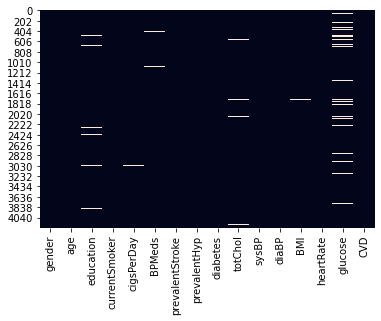

In [8]:
# plot heatmap of null

sns.heatmap(df_heart.isnull(),cbar=False)

In [9]:
# Count total number of missing values
count = 0
for i in df_heart.isnull().sum(axis=1):
    if i > 0:
        count = count+1
print('Total number of rows with missing values is', count)

print('Percentage of total dataset %2f',count/df_heart.shape[0]*100)

Total number of rows with missing values is 582
Percentage of total dataset %2f 13.726415094339622


From the output above we got the total number of rows with missing value is 582. In this case, since it is only 13.7 % of the entire dataset, the rows with missing values are excluded.

In [10]:
df_heart.dropna(axis=0, inplace=True)
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   object 
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   object 
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   object 
 6   prevalentStroke  3658 non-null   object 
 7   prevalentHyp     3658 non-null   object 
 8   diabetes         3658 non-null   object 
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  CVD              3658 non-null   int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 485.8+ KB


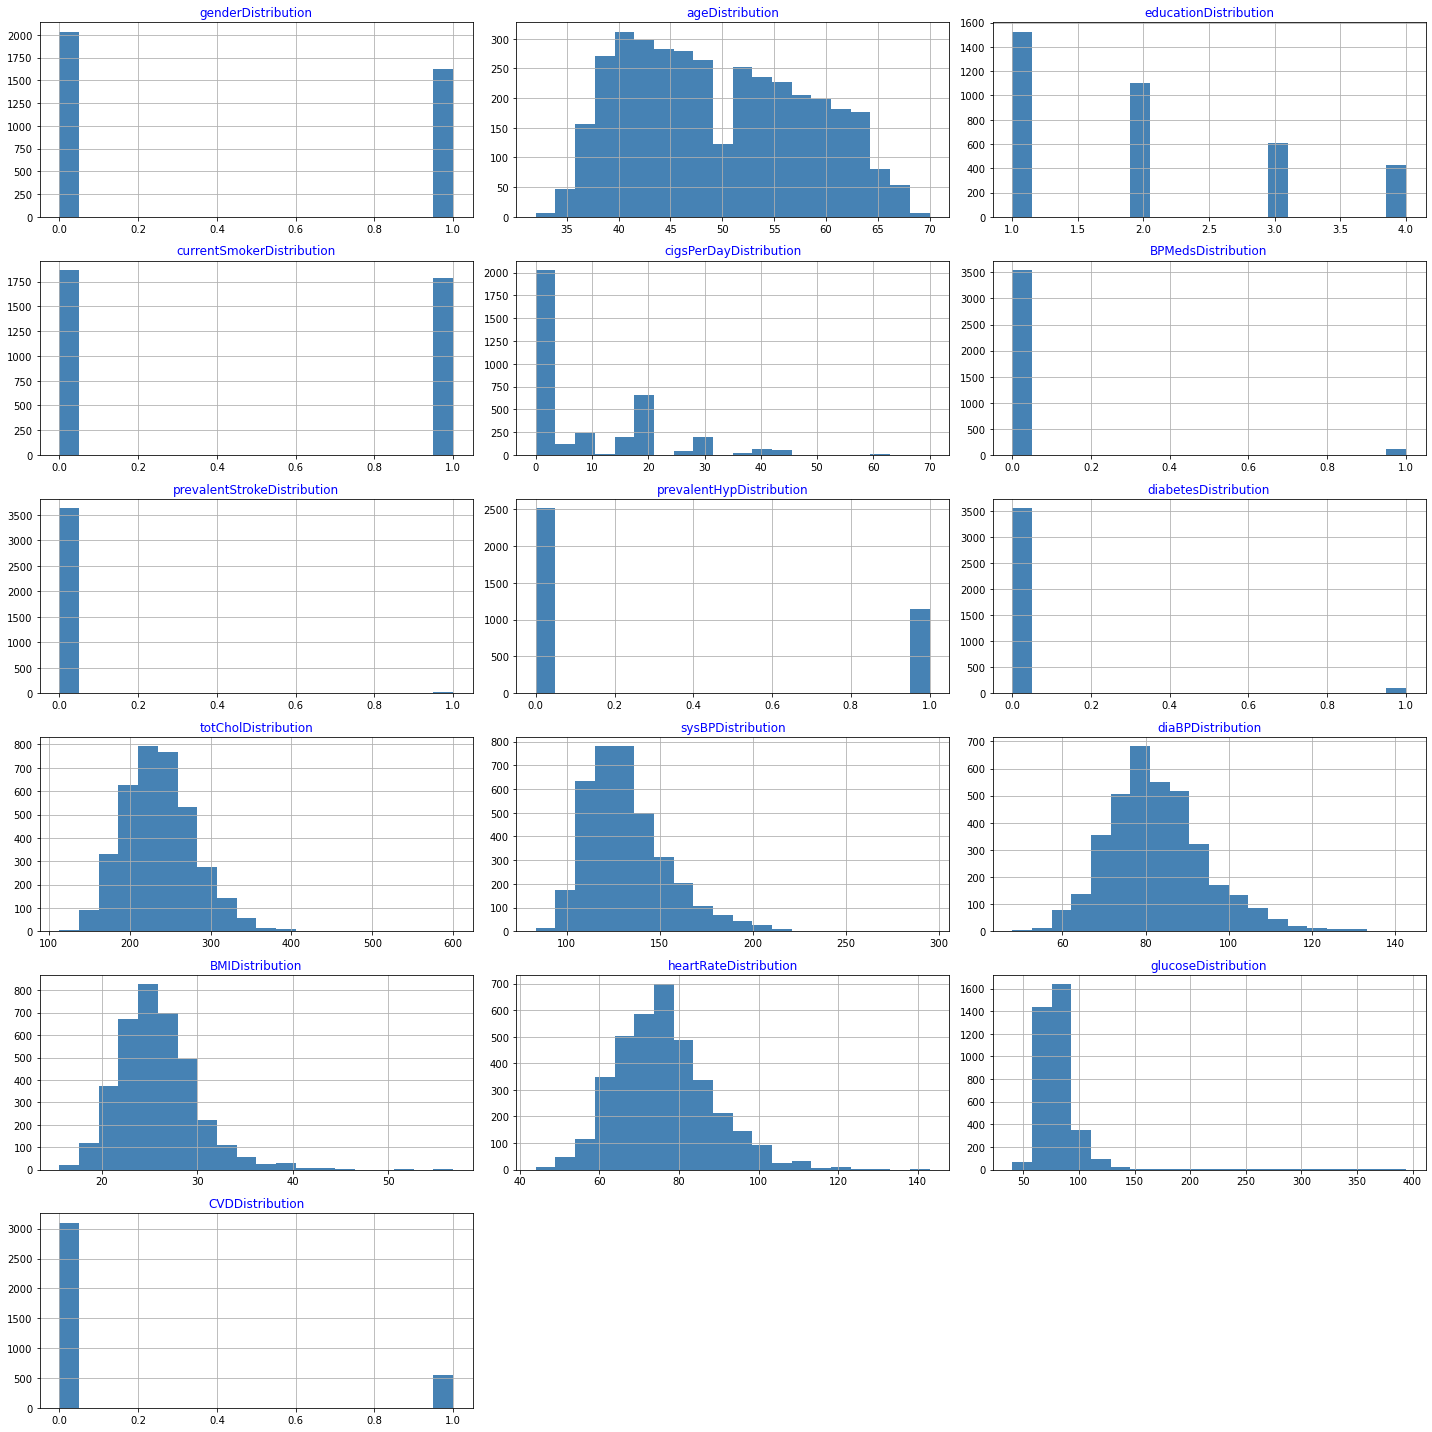

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='steelblue')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df_heart, df_heart.columns, 6, 3)

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df_heart['CVD'].value_counts()

0    3101
1     557
Name: CVD, dtype: int64

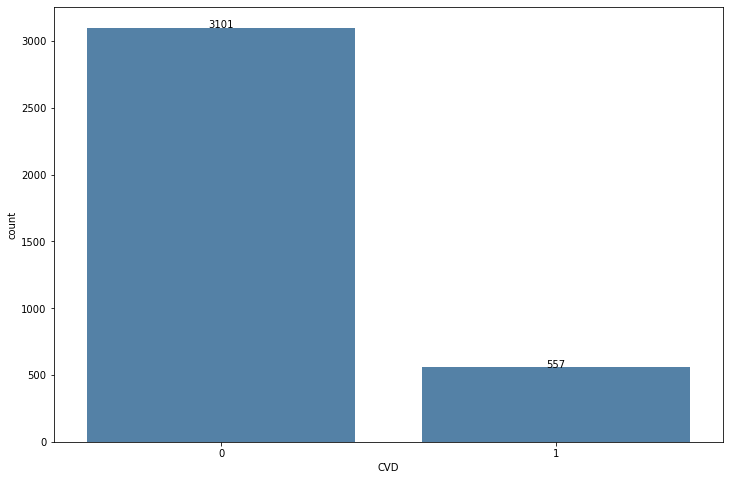

In [13]:
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha = 'center')
  
plt.figure(figsize =(12,8))
sns.countplot(x='CVD', data=df_heart,color ='steelblue')

y = df_heart['CVD'].value_counts()
# calling the function to add value labels
addlabels(y)

CVD: Does the patient have cardiovascular disease: Yes(1) or No(0) <br>From the figure above, we can conclude if there are 3101 patients with no CVD and 557 patients with the risk of Coronary Heart Disease.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df_heart)
df_constant.head()

,const,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1.000,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,1.000,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1.000,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,1.000,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,1.000,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


In [15]:
target_col_name = 'CVD'
X = pd.get_dummies(df_heart[['diaBP','sysBP','BPMeds']], drop_first=True)
y = df_heart[target_col_name]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_test_scaled =scaler.transform(X_test)
X_train_scaled =scaler.transform(X_train)

df_X_train_scaled = pd.DataFrame(X_train_scaled,
                                 index=X_train.index,
                                 columns=X_train.columns)

df_X_test_scaled = pd.DataFrame(X_test_scaled,
                                 index=X_test.index,
                                 columns=X_test.columns)

In [18]:
import statsmodels.api as sm

In [19]:
X_train_with_constant =sm.add_constant(df_X_train_scaled,has_constant ='add')
X_test_with_constant =sm.add_constant(df_X_test_scaled,has_constant ='add')

In [20]:
model =sm.Logit(y_train,X_train_with_constant).fit()

Optimization terminated successfully.
         Current function value: 0.402717
         Iterations 6


In [21]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2922
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                 0.05141
Time:                        22:53:19   Log-Likelihood:                -1178.3
converged:                       True   LL-Null:                       -1242.2
Covariance Type:            nonrobust   LLR p-value:                 1.673e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8234      0.055    -32.863      0.000      -1.932      -1.715
diaBP         -0.1290      0.079     -1.642      0.101      -0.283       0.025
sysBP          0.6148      0.078      7.872      0.0

In [22]:
y_test_pred = model.predict(X_test_with_constant)
y_test_pred.head()

1171   0.290
912    0.203
3836   0.259
3993   0.113
2605   0.253
dtype: float64

In [23]:
def fun(x):
    if x <0.5:
        return 0
    else:
        return 1
y_test_pred =y_test_pred.apply(fun)

In [24]:
y_test_pred.value_counts()

0    720
1     12
dtype: int64

In [25]:
#y_test_pred = model.predict(X_test_with_constant)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy of the model is %.2f' % (accuracy*100))

Accuracy of the model is 83.74


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Filter  categorical variables.

In [26]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_heart.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes'],
      dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [27]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [28]:
dummy_var.head()

,gender_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,0,0,0,0
3,0,1,0,0,1,0
4,0,1,0,0,0,0


In [29]:
X = dummy_var
df_target = df_heart[target_col_name]
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (2926, 7)
y_train (2926,)
X_test (732, 7)
y_test (732,)


In [30]:
model =sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.395493
         Iterations 6


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2919
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                 0.05248
Time:                        22:53:20   Log-Likelihood:                -1157.2
converged:                       True   LL-Null:                       -1221.3
Covariance Type:            nonrobust   LLR p-value:                 3.111e-25
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4301      0.106    -23.020      0.000      -2.637      -2.223
gender_1              0.5556      0.110      5.028      0.000       0.339       0.772
currentSmoker_1       0.0022      0.111      0.020      0.984      -0.215       0.220
BPMeds_1.0            0.6856      0.236      2.911      0.004       0.224       1.147
prevalentStroke_1     0.7143      0.503      1.421      0.155      -0.271       1.700
prevalentHyp_1        0.8535      0.113      7.561      0.000       0.632       1.075
diabetes_1            0.8902      0.255      3.489      0.000       0.390       1.390
=====================================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
#df.rename(columns={ df.columns[1]: "your value" }, inplace = True)
df =pd.DataFrame(model.params)
df.rename(columns = {df.columns[0]:'Parameter'},inplace=True)
df[df.index =='prevalentHyp_1']

,Parameter
prevalentHyp_1,0.854


**Interpretation:** 
 prevalentHyp = 0.854, it implies that the odds of getting CVD increases by a factor of 0.854 due to presence of hypertension, keeping other variables constant   

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# Convert all columns to numeric
target_col_name = 'CVD'
X = pd.get_dummies(df_heart.drop(target_col_name, axis=1), drop_first=True)
y = df_heart[target_col_name]


In [34]:
X.shape
y.shape

(3658,)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2926, 15)
(732, 15)
(2926,)
(732,)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_test_scaled =scaler.transform(X_test)
X_train_scaled =scaler.transform(X_train)

df_X_train_scaled = pd.DataFrame(X_train_scaled,
                                 index=X_train.index,
                                 columns=X_train.columns)

df_X_test_scaled = pd.DataFrame(X_test_scaled,
                                 index=X_test.index,
                                 columns=X_test.columns)

In [38]:
import statsmodels.api as sm

In [39]:
X_train_with_constant =sm.add_constant(df_X_train_scaled,has_constant ='add')
X_test_with_constant =sm.add_constant(df_X_test_scaled,has_constant ='add')

In [40]:
full_model =sm.Logit(y_train,X_train_with_constant).fit()

Optimization terminated successfully.
         Current function value: 0.374938
         Iterations 7


In [41]:
print(full_model.summary())

                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2910
Method:                           MLE   Df Model:                           15
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                  0.1168
Time:                        22:53:20   Log-Likelihood:                -1097.1
converged:                       True   LL-Null:                       -1242.2
Covariance Type:            nonrobust   LLR p-value:                 5.816e-53
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.0034      0.064    -31.286      0.000      -2.129      -1.878
age                   0.5759      0.064      8.954      0.000       0.450       0.702
education            -0.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
significat_var =pd.DataFrame(full_model.pvalues)
significat_var.rename(columns={0:'pValue'},inplace=True)
significat_var[significat_var['pValue']<0.05]

,pValue
const,0.000
age,0.000
sysBP,0.000
glucose,0.010
gender_1,0.000


***Interpretation*** <br>
from model age,sysBP,glucose,gender have signinficant impact on CVD

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
full_model.params

const               -2.003
age                  0.576
education           -0.072
cigsPerDay           0.126
totChol              0.107
sysBP                0.344
diaBP               -0.032
BMI                  0.026
heartRate           -0.002
glucose              0.149
gender_1             0.287
currentSmoker_1      0.128
BPMeds_1.0           0.025
prevalentStroke_1    0.054
prevalentHyp_1       0.045
diabetes_1           0.014
dtype: float64

***Interpretation***<br>
const: The odds of getting an admission is -2.003, considering all other variables take zero value<br>
education = -0.072, it implies that the odds of getting CVD decreased by a factor of -0.072due to one unit increase in the education, keeping other variables constant  <br>
diaBP = -0.032, it implies that the odds of getting CVD decreased by a factor of -0.032due to one unit increase in the diaBP, keeping other variables constant  <br>
heartRate = -0.002, it implies that the odds of getting CVD decreased by a factor of -0.002due to one unit increase in the heartRate, keeping other variables constant  <br>
diabetes_1 = 0.014, it implies that the odds of getting CVD increases by a factor of 0.014due to one unit increase in the diabetes_1, keeping other variables constant  <br>
BPMeds_1.0 = 0.025, it implies that the odds of getting CVD increases by a factor of 0.025due to one unit increase in the BPMeds_1.0, keeping other variables constant  <br>
BMI = 0.026, it implies that the odds of getting CVD increases by a factor of 0.026due to one unit increase in the BMI, keeping other variables constant  <br>
prevalentHyp_1 = 0.045, it implies that the odds of getting CVD increases by a factor of 0.045due to one unit increase in the prevalentHyp_1, keeping other variables constant  <br>
prevalentStroke_1 = 0.054, it implies that the odds of getting CVD increases by a factor of 0.054due to one unit increase in the prevalentStroke_1, keeping other variables constant  <br>
totChol = 0.107, it implies that the odds of getting CVD increases by a factor of 0.107due to one unit increase in the totChol, keeping other variables constant  <br>
cigsPerDay = 0.126, it implies that the odds of getting CVD increases by a factor of 0.126due to one unit increase in the cigsPerDay, keeping other variables constant  <br>
currentSmoker_1 = 0.128, it implies that the odds of getting CVD increases by a factor of 0.128due to one unit increase in the currentSmoker_1, keeping other variables constant  <br>
glucose = 0.149, it implies that the odds of getting CVD increases by a factor of 0.149due to one unit increase in the glucose, keeping other variables constant  <br>
gender_1 = 0.287, it implies that the odds of getting CVD increases by a factor of 0.287due to one unit increase in the gender_1, keeping other variables constant  <br>
sysBP = 0.344, it implies that the odds of getting CVD increases by a factor of 0.344due to one unit increase in the sysBP, keeping other variables constant  <br>
age = 0.576, it implies that the odds of getting CVD increases by a factor of 0.576due to one unit increase in the age, keeping other variables constant  <br>



<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = full_model.predict(X_test_with_constant)

# print the y_pred_prob
y_pred_prob.head()

1171   0.199
912    0.250
3836   0.180
3993   0.036
2605   0.478
dtype: float64

In [45]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [46]:
# print the first five observations of y_pred
y_pred[0:5]

[0, 0, 0, 0, 0]

#### Plot the confusion matrix.

In [47]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

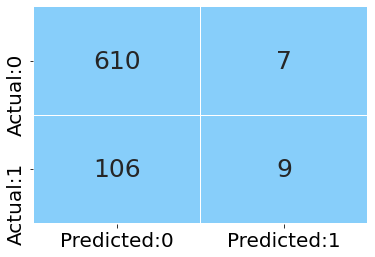

In [48]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [49]:
cm =confusion_matrix(y_test, y_test_pred).ravel()
cm

array([609,   8, 111,   4], dtype=int64)

In [50]:
 tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

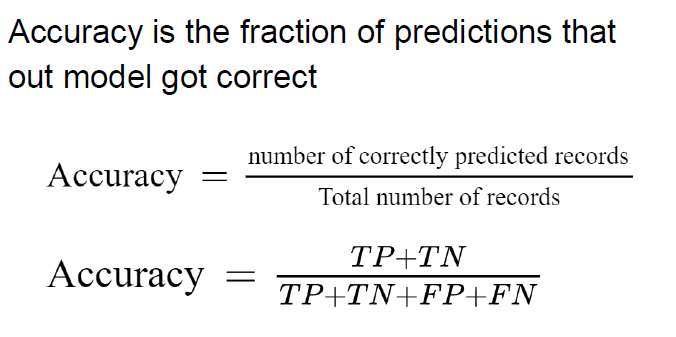

In [51]:
Accuaracy = (tp+tn)/(tp+tn+fp+fn)
print(Accuaracy)

0.837431693989071


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

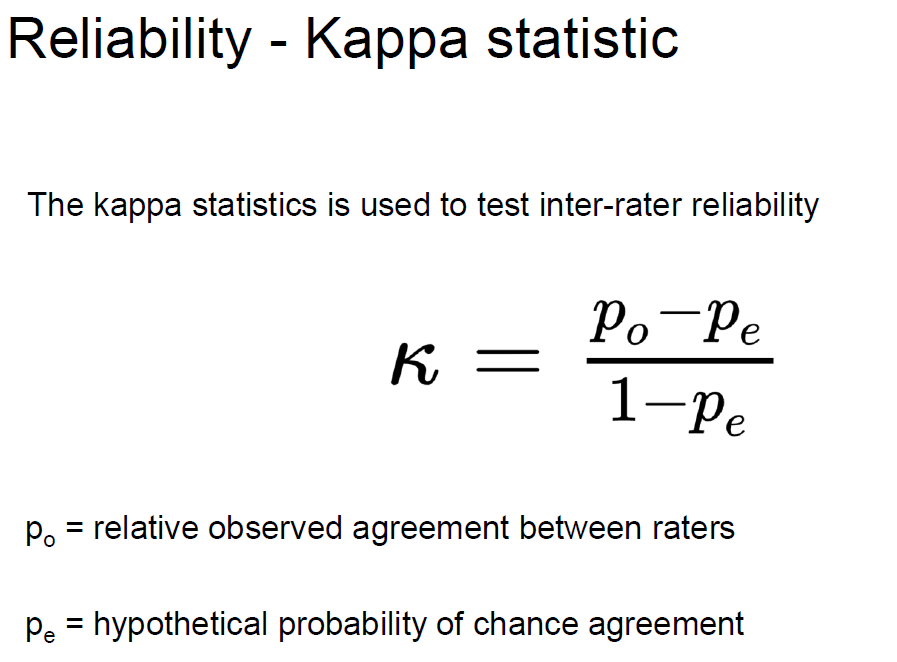

In [52]:
Po =(tp+tn)/(tp+tn+fp+fn)
P_postive =(fp+tn)/(tp+tn+fp+fn)
P_negative =(fn+tn)/(tp+tn+fp+fn)
Pe =P_postive*P_negative
Kappa = (Po-Pe)/(1-Pe)
print(Kappa)

0.04887316561844896


***Interpreation*** <br>
even though the accuarcy is 0.837 kappa score is very low 0.05 indicating only slight agreement between ratings

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

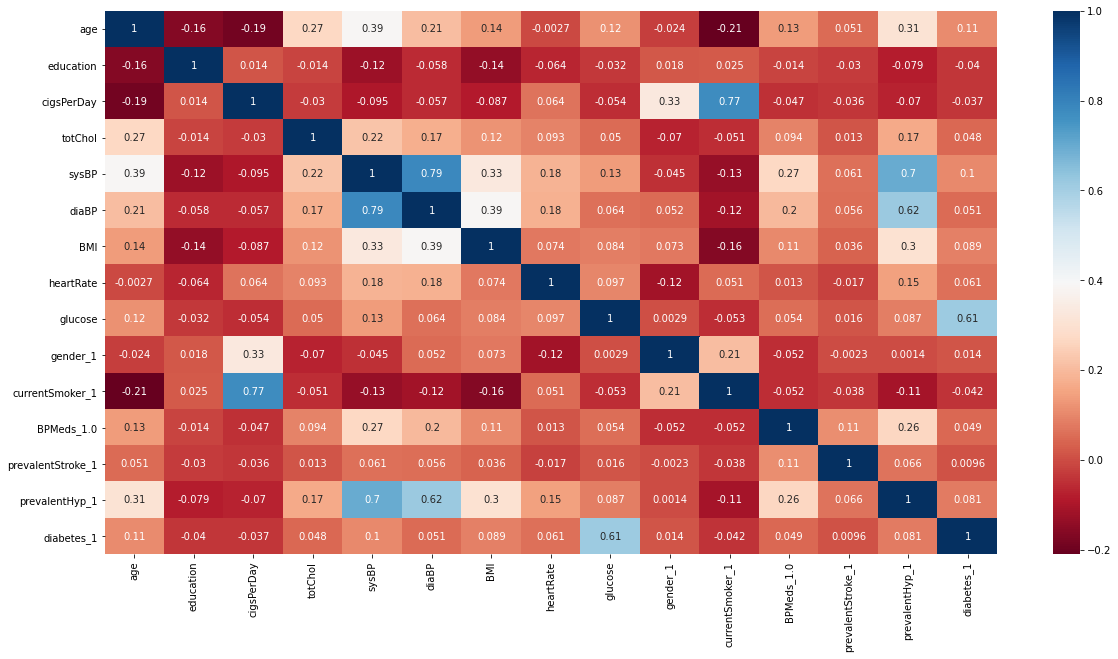

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True,cmap='RdBu')

In [54]:

Corr= pd.DataFrame(X.corr())
Corr.head()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender_1,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
age,1.000,-0.159,-0.189,0.268,0.388,0.208,0.138,-0.003,0.118,-0.024,-0.211,0.135,0.051,0.306,0.109
education,-0.159,1.000,0.014,-0.014,-0.124,-0.058,-0.138,-0.064,-0.032,0.018,0.025,-0.014,-0.030,-0.079,-0.040
cigsPerDay,-0.189,0.014,1.000,-0.030,-0.095,-0.057,-0.087,0.064,-0.054,0.330,0.774,-0.047,-0.036,-0.070,-0.037
totChol,0.268,-0.014,-0.030,1.000,0.220,0.174,0.121,0.093,0.050,-0.070,-0.051,0.094,0.013,0.167,0.048
sysBP,0.388,-0.124,-0.095,0.220,1.000,0.787,0.331,0.185,0.135,-0.045,-0.134,0.271,0.061,0.698,0.103


In [55]:
corr_pairs = Corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs=pd.DataFrame(sorted_pairs)
sorted_pairs.rename(columns={0:'Value'},inplace=True)

print(sorted_pairs)

                                 Value
currentSmoker_1 age             -0.211
age             currentSmoker_1 -0.211
cigsPerDay      age             -0.189
age             cigsPerDay      -0.189
BMI             currentSmoker_1 -0.160
...                                ...
totChol         totChol          1.000
cigsPerDay      cigsPerDay       1.000
education       education        1.000
prevalentHyp_1  prevalentHyp_1   1.000
diabetes_1      diabetes_1       1.000

[225 rows x 1 columns]


In [56]:
highly_corr =sorted_pairs[sorted_pairs['Value']>0.6]
highly_corr

,,Value
diabetes_1,glucose,0.615
glucose,diabetes_1,0.615
prevalentHyp_1,diaBP,0.618
diaBP,prevalentHyp_1,0.618
sysBP,prevalentHyp_1,0.698
prevalentHyp_1,sysBP,0.698
cigsPerDay,currentSmoker_1,0.774
currentSmoker_1,cigsPerDay,0.774
diaBP,sysBP,0.787
sysBP,diaBP,0.787


In [57]:
# from correlation matrix we find three columns with high correlation , so they can be dropped from model
to_drop =['diabetes_1','prevalentHyp_1','currentSmoker_1','education','diaBP']

In [58]:
X_opt = X.drop(columns=to_drop,axis=1)
X_opt.head()

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,gender_1,BPMeds_1.0,prevalentStroke_1
0,39,0.000,195.000,106.000,26.970,80.000,77.000,1,0,0
1,46,0.000,250.000,121.000,28.730,95.000,76.000,0,0,0
2,48,20.000,245.000,127.500,25.340,75.000,70.000,1,0,0
3,61,30.000,225.000,150.000,28.580,65.000,103.000,0,0,0
4,46,23.000,285.000,130.000,23.100,85.000,85.000,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
X_opt_train,X_opt_test,y_opt_train,y_opt_test =train_test_split(X_opt,y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_opt_train)
X_opt_test_scaled =scaler.transform(X_opt_test)
X_opt_train_scaled =scaler.transform(X_opt_train)

df_X_opt_train_scaled = pd.DataFrame(X_opt_train_scaled,
                                 index=X_opt_train.index,
                                 columns=X_opt_train.columns)

df_X_opt_test_scaled = pd.DataFrame(X_opt_test_scaled,
                                 index=X_opt_test.index,
                                 columns=X_opt_test.columns)

import statsmodels.api as sm

X_opt_train_with_constant =sm.add_constant(df_X_opt_train_scaled,has_constant ='add')
X_opt_test_with_constant =sm.add_constant(df_X_opt_test_scaled,has_constant ='add')

model_opt =sm.Logit(y_opt_train,X_opt_train_with_constant).fit()

print(model_opt.summary())

Optimization terminated successfully.
         Current function value: 0.375675
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2915
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                  0.1151
Time:                        22:53:22   Log-Likelihood:                -1099.2
converged:                       True   LL-Null:                       -1242.2
Covariance Type:            nonrobust   LLR p-value:                 1.429e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9998      0.064    -31.314      0.000      -2.125      -1.875
age     

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
params = np.exp(model_opt.params)
conf = np.exp(model_opt.conf_int())
conf['OR'] = params
pvalue = round(model_opt.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
conf.sort_values(by='Odds Ratio',inplace=True,ascending=False)
print((conf.head(5)))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
age                1.591          2.030       1.797   0.000
sysBP              1.265          1.589       1.418   0.000
gender_1           1.178          1.493       1.327   0.000
cigsPerDay         1.112          1.387       1.242   0.000
glucose            1.074          1.279       1.172   0.000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# let 'y_pred_prob' be the predicted values of y
y_opt_pred_prob = model_opt.predict(X_opt_test_with_constant)

# print the y_pred_prob
y_opt_pred_prob.head()

# convert probabilities to 0 and 1 using 'if_else'
y_opt_pred = [ 0 if x < 0.5 else 1 for x in y_opt_pred_prob]

# print the first five observations of y_pred
y_opt_pred[0:5]

[0, 0, 0, 0, 1]

In [62]:
from sklearn.metrics import classification_report

In [63]:
# calculate various performance measures
acc_table = classification_report(y_opt_test, y_opt_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       617
           1       0.56      0.08      0.14       115

    accuracy                           0.85       732
   macro avg       0.71      0.53      0.53       732
weighted avg       0.81      0.85      0.79       732



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 1440x720 with 0 Axes>

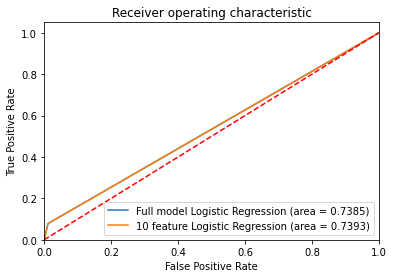

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure(figsize=(20,10))
# full model
logit_roc_auc = roc_auc_score(y_test, full_model.predict(X_test_with_constant))
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Full model Logistic Regression (area = %0.4f)' % logit_roc_auc)

# optmised model
opt_logit_roc_auc = roc_auc_score(y_opt_test, model_opt.predict(X_opt_test_with_constant))
fpr, tpr, thresholds = roc_curve(y_opt_test,y_opt_pred)
#plt.figure()
plt.plot(fpr, tpr, label='10 feature Logistic Regression (area = %0.4f)' % opt_logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
X_hr = df_heart['heartRate']
y_hr =df_heart['CVD']

In [66]:
from sklearn.model_selection import train_test_split
X_hr_train,X_hr_test,y_hr_train,y_hr_test =train_test_split(X_hr,y_hr,random_state=1,test_size=0.2)

In [67]:
import statsmodels.api as sm

X_hr_train_with_constant =sm.add_constant(X_hr_train,has_constant ='add')
X_hr_test_with_constant =sm.add_constant(X_hr_test,has_constant ='add')

model_hr =sm.Logit(y_hr_train,X_hr_train_with_constant).fit()

print(model_hr.summary())


Optimization terminated successfully.
         Current function value: 0.424015
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2924
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                0.001242
Time:                        22:53:22   Log-Likelihood:                -1240.7
converged:                       True   LL-Null:                       -1242.2
Covariance Type:            nonrobust   LLR p-value:                   0.07898
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2865      0.323     -7.087      0.000      -2.919      -1.654
heartRate      0.0074      0.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# let 'y_pred_prob' be the predicted values of y
y_hr_pred_prob = model_hr.predict(X_hr_test_with_constant)

# print the y_pred_prob
y_hr_pred_prob.head()

# convert probabilities to 0 and 1 using 'if_else'
y_hr_pred = [ 0 if x < 0.5 else 1 for x in y_hr_pred_prob]

# print the first five observations of y_pred
y_hr_pred[0:5]

[0, 0, 0, 0, 0]

In [69]:
from sklearn.metrics import log_loss
  
LogLoss_hr = log_loss(y_hr_test, y_hr_pred, eps = 1e-15,
    normalize = True, sample_weight = None, labels = None)
print(LogLoss_hr)

5.426173887178591


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
LogLoss = log_loss(y_test, y_pred, eps = 1e-15,
    normalize = True, sample_weight = None, labels = None)
print(LogLoss)

5.331813292085955


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
print('Cross Entropy of full model is %.3f'%(LogLoss))


Cross Entropy of full model is 5.332


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   object 
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   object 
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   object 
 6   prevalentStroke  3658 non-null   object 
 7   prevalentHyp     3658 non-null   object 
 8   diabetes         3658 non-null   object 
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  CVD              3658 non-null   int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 614.9+ KB


In [73]:
X_smoke = df_heart['cigsPerDay'].astype(int)
y_smoke =df_heart['CVD']

from sklearn.model_selection import train_test_split
X_smoke_train,X_smoke_test,y_smoke_train,y_smoke_test =train_test_split(X_smoke,y_smoke,random_state=1,test_size=0.3)

import statsmodels.api as sm

X_smoke_train_with_constant =sm.add_constant(X_smoke_train,has_constant ='add')
X_smoke_test_with_constant =sm.add_constant(X_smoke_test,has_constant ='add')

model_smoke =sm.Logit(y_smoke_train,X_smoke_train_with_constant).fit()

print(model_smoke.summary())


Optimization terminated successfully.
         Current function value: 0.425625
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2558
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                0.002643
Time:                        22:53:22   Log-Likelihood:                -1089.6
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                   0.01626
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8179      0.070    -25.791      0.000      -1.956      -1.680
cigsPerDay     0.0107      0.

In [74]:
# let 'y_pred_prob' be the predicted values of y
y_smoke_pred_prob = model_smoke.predict(X_smoke_test_with_constant)

# print the y_pred_prob
y_smoke_pred_prob.head()

# convert probabilities to 0 and 1 using 'if_else'
y_smoke_pred = [ 0 if x < 0.5 else 1 for x in y_smoke_pred_prob]

# print the first five observations of y_pred
y_smoke_pred[0:5]


[0, 0, 0, 0, 0]

#### Plot the confusion matrix.

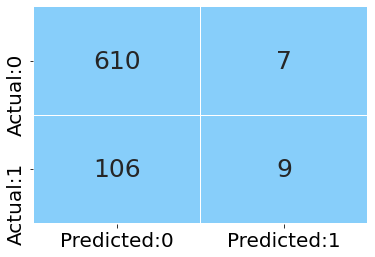

In [75]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [76]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

**Precision:** It is defined as the ratio of true positives to the total positive predictions.

In [77]:
# calculate the precision value
precision = TP / (TP+FP)

# print the value
precision

0.5625

**Recall:** It is the ratio of true positives to the total actual positive observations. It is also known as, `Sensitivity` or `True Positive Rate`.

In [78]:
# calculate the recall value
recall = TP / (TP+FN)

# print the value
recall

0.0782608695652174

**Specificity:** It is the ratio of true negatives to the total actual negative observations.

In [79]:
# calculate the specificity value
specificity = TN / (TN+FP)

# print the value
specificity

0.9886547811993517

**f1-score:** It is defined as the harmonic mean of precision and recall.

In [80]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))

# print the f1_score
f1_score

0.13740458015267176

**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [81]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
accuracy

0.8456284153005464

**Interpretation:** For our dataset, both the values for accuracy and f1-score are equal. We can say that our model is 82.5% accurate.

We can also calculate the above measures using the `classification_report()`

In [82]:
# calculate various performance measures
acc_table = classification_report(y_smoke_test, y_smoke_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       931
           1       0.00      0.00      0.00       167

    accuracy                           0.85      1098
   macro avg       0.42      0.50      0.46      1098
weighted avg       0.72      0.85      0.78      1098



**Interpretation:** 

From the above output, we can infer that the recall of the positive class is known as `sensitivity` and the recall of the negative class is `specificity`.

`support` is the number of observations in the corresponding class.

The `macro average` in the output is obtained by averaging the unweighted mean per label and the `weighted average` is given by averaging the support-weighted mean per label.

<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [83]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.809,0.395,0.133,0.413
1,0.800,0.394,0.136,0.406
2,0.800,0.395,0.135,0.405
3,0.774,0.371,0.144,0.403
4,0.791,0.389,0.137,0.402


As we can see that the optimal cut-off probability is approximately 0.133. Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.133, then consider it to be 0 else consider it to be 1.

In [84]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.133 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

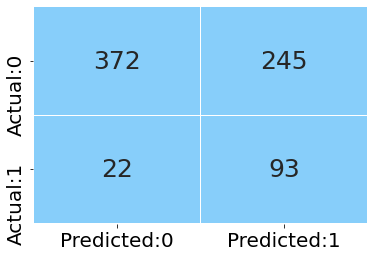

In [85]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_youden)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [86]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.94      0.60      0.74       617
           1       0.28      0.81      0.41       115

    accuracy                           0.64       732
   macro avg       0.61      0.71      0.57       732
weighted avg       0.84      0.64      0.68       732



**Interpretation:** From the above output, we can see that the model with cut-off = 0.133, is 68% accurate. The specificity and the sensitivity are nearly balanced.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The full logistic regression model (build in section 3), have different values for false positives (FP) and false negatives (FN). Thus, we can use the cost-based method to calculate the optimal value of the cut-off. In this method, we find the optimal value of the cut-off for which the total cost is minimum. The total cost is given by the formula:

<p style='text-indent:25em'> <strong>total_cost = FN x C_1 + FP x C_2 </strong> </p>

Where,<br>
C_1: It is the cost of false negatives <br>
C_2: It is the cost of false positives

The cost values can be decided using business knowledge.

In [87]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 3.5 and 2 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3.5, 2) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1

In [88]:
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first ten rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
32,0.420,363.500
30,0.400,366.000
31,0.410,367.500
24,0.340,374.500
29,0.390,376.000
35,0.450,376.000
34,0.440,376.500
25,0.350,377.500
33,0.430,379.000
27,0.370,379.500


From the above output we can see that, the 'total_cost' is least for the cut-off probability values 0.420. Thus, we can consider any of these value as the cut-off probability.

Here, we are considering the cut-off value as 0.420. i.e. if 'y_pred_prob' is less than 0.420, then consider it to be 0 else consider it to be 1.

In [89]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_cost = [ 0 if x < 0.420 else 1 for x in y_pred_prob]

#### Plot the confusion matrix.

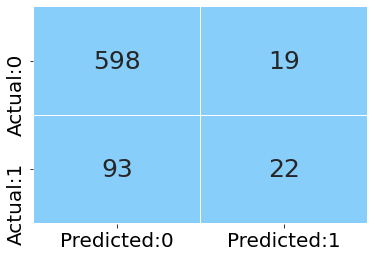

In [90]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_cost)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Compute various performance metrics.**

In [91]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_cost)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       617
           1       0.54      0.19      0.28       115

    accuracy                           0.85       732
   macro avg       0.70      0.58      0.60       732
weighted avg       0.81      0.85      0.82       732



**Interpretation:** From the above output, we can see that the model with cut-off = 0.420 is 82% accurate. 

In [92]:
from sklearn.metrics import cohen_kappa_score

In [93]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_cost)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.21742616597621278


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.420) is 0.22, we can say that there is Fair agreement agreement between the actual and predicted values.